# Titanic - Solução ciência de dados

## Descrição e processos a serem executados

### Referência

1. [Titanic Data Science Solutions [upd]](https://www.kaggle.com/code/andrej0marinchenko/titanic-data-science-solutions-upd) 


### Estágios do trabalho

O fluxo de trabalho da solução de concorrência passa por sete etapas descritas no livro Data Science Solutions.

1. Pergunta ou definição do problema.
2. Adquir dados de treinamento e teste.
3. Discutir, preparar, limpar os dados.
4. Analisar, identificar padrões e explorar os dados.
5. Modelação, previsão e resolução do problema.
6. Visualizar, relatar e apresentar as etapas de resolução de problemas e a solução final.
7. Fornecer ou apresentar os resultados.


### Questão e definição do problema

A descrição do problema é encontrada no kaggle através deste link: [Descrição do problema](https://www.kaggle.com/c/titanic).

> Através de um conjunto de dados de treinamento que lista passageiros sobreviventes ou não ao desastre do Titanic, nosso modelo pode determinar com base em um determinado conjunto de dados de teste que não contém as informações de sobrevivência, se esses passageiros no conjunto de dados de teste sobreviveram ou não.

- Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1.502 dos 2.224 passageiros e tripulantes. Taxa de sobrevivência foi de 32%.
- Uma das razões que levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e tripulantes.
- Embora houvesse algum elemento de sorte envolvido em sobreviver ao naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e pessoas de classes sociais mais altas.

### Metas de fluxo de trabalho

O fluxo de trabalho das soluções de ciência de dados resolve sete objetivos principais.

**Classificar.** Podemos querer classificar ou categorizar nossas amostras. Também podemos querer entender as implicações ou a correlação de diferentes classes com nosso objetivo de solução.

**Correlacionar.** Pode-se abordar o problema com base nas características disponíveis no conjunto de dados de treinamento. Quais características do conjunto de dados contribuem significativamente para nossa meta de solução? Estatisticamente falando, existe uma [correlação](https://en.wikiversity.org/wiki/Correlation) entre uma características e uma meta de solução? À medida que os valores das características mudam, o estado da solução também muda e vice-versa? Isso pode ser testado para características do tipo numéricas e categóricas no conjunto de dados fornecido. Também podemos querer determinar a correlação entre outras características além da sobrevivência para metas subsequentes e estágios de fluxo de trabalho. Correlacionar determinadas características pode ajudar na criação, conclusão ou correção de características.

**Conversão.** Para a etapa de modelagem, é preciso preparar os dados. Dependendo da escolha do algoritmo do modelo, pode-se exigir que todas as características sejam convertidas em valores numéricos equivalentes. Assim, por exemplo, converter valores categóricos de texto em valores numéricos.

**Concluindo.** A preparação de dados também pode exigir que estimemos quaisquer valores ausentes em uma característica. Os algoritmos de modelo podem funcionar melhor quando não há valores ausentes.

**Correção.** Também podemos analisar o conjunto de dados de treinamento fornecido em busca de erros ou valores possivelmente imprecisos nas características e tentar corrigir esses valores ou excluir as amostras que contêm os erros. Uma maneira de fazer isso é detectar quaisquer discrepâncias entre nossas amostras ou características. Também podemos descartar completamente uma característica se ela não estiver contribuindo para a análise ou puder distorcer significativamente os resultados.

**Criando.** Podemos criar novas características com base em uma característica existente ou em um conjunto de características, de modo que a nova característica siga as metas de correlação, conversão e integridade.

**Gráficos.** Como selecionar os gráficos de visualização corretos, dependendo da natureza dos dados e dos objetivos da solução.

## Libs

In [1]:
# análise de dados
import pandas as pd
import numpy as np
import random as rnd

# visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Fonte dos dados

Os dados são provinientes do desafio ["Titanic - Machine Learning from Disaster"](https://www.kaggle.com/competitions/titanic/data) do kaggle.

Será utilizado os pacotes Python Pandas para trabalhar com nossos conjuntos de dados.<br>
Começamos adquirindo os conjuntos de dados de treinamento(train.csv) e teste(test.csv) no Pandas DataFrames.<br>
Também combinamos esses conjuntos de dados para executar determinadas operações em ambos os conjuntos de dados juntos.

In [2]:
df_treino = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
datasets = [df_treino, df_test]

In [3]:
#visualizando a tabela
df_treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Descrevendo dados

Observando os nomes das características para manipulá-las ou analisá-las diretamente. Esses nomes de características são descritos na [página de dados do Kaggle aqui](https://www.kaggle.com/c/titanic/data).

### Descrição das variáveis 

| Variavel  | Definição                                | Key                                              |
|-----------|------------------------------------------|------------------------------------------------|
| **Survival**  | Sobrevivente                             | 0 = Não, 1 = Sim                              |
| **Pclass**    | Classe do ticket                        | 1 = 1º classe,  2 = 2º classe,  3 = 3º classe  |
| **Sex**       | Sexo                                     |                                              |
| **Age**       | Idade                                    |                                              |
| **Sibsp**     | Nº de irmãos/cônjuges a bordo do Titanic |                                              |
| **Parch**     | Nº de pais/filhos a bordo do Titanic     |                                             |
| **Ticket**    | Número do ticket                         |                                             |
| **Fare**      | Tarifa paga para embarcar                |                                             |
| **Cabin**     | Número da cabine                         |                                             |
| **Embarked**  | Porto de embarcação                      | C = Cherbourg,  Q = Queenstown,  S = Southampton |
|**Surname**|Sobrenome da familia||


### Notas sobre as variáveis
**pclass:** Representa o status socioeconômico (SES)
- 1º = Superior
- 2º = Médio
- 3º = Inferior
<br>

**idade:** a idade é fracionada se for menor que 1. Se a idade for estimada, ela está na forma de xx,5
<br><br>

**sibsp:** O conjunto de dados define as relações familiares desta forma...
- Sibling = irmão, irmã, meio-irmão, meia-irmã
- Spouse = marido, esposa (amantes e noivos foram ignorados)
<br>

**parch:** O conjunto de dados define as relações familiares dessa maneira...
- Parent = mãe, pai
- Child = filha, filho, enteada, enteado
- **Algumas crianças viajavam apenas com uma babá, portanto parch=0 para elas.**

### Descrição das características das variáveis

#### Descrição

**Quais características são categóricas?**
As características categóricas são valores nominais, ordinais, razão ou intervalo. Isso nos ajuda a selecionar os gráficos apropriados para visualização.

- **Categórico:** Survival, Sex e Embarked. 
- **Ordinal:** Pclass.
<br><br>

**Quais características são numéricos?**

As características numéricas são os valores são discretos, contínuos ou baseados em séries temporais. Isso nos ajuda a selecionar os gráficos apropriados para visualização.

- **Contínuo:** Age, Fare. 
- **Discreta:** Sibsp, Parch.
<br><br>

**Quais características são tipos de dados mistos?**

Dados numéricos e alfanuméricos dentro da mesma característica. Estes são candidatos para corrigir o objetivo.

- **Ticket:** é uma mistura de tipos de dados numéricos e alfanuméricos. 
- **Cabin:** é alfanumérica.
<br><br>

**Quais características podem conter erros ou erros de digitação?**

Isso é mais difícil de revisar para um grande conjunto de dados, no entanto, revisar algumas amostras de um conjunto de dados menor pode nos dizer diretamente quais itens podem exigir correção.

- A variável **Name** e **Surname** pode conter erros ou erros de digitação, pois há várias maneiras de descrever um nome, incluindo títulos, colchetes e aspas usadas para nomes alternativos ou curtos.

In [4]:
df_treino.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Quais variáveis contêm valores em branco, nulos ou vazios?**

**Estas exigirão correção:**
- As variáveis **Cabin > Age > Embarked** contêm vários valores nulos nessa ordem para o conjunto de dados de treinamento.
- **Cabin > Age** estão incompletos no caso de conjunto de dados de teste.

**Quais são os tipos de dados para vários recursos?**
Ajudando-nos durante a meta de conversão.
- Sete variáveis são do tipo int ou float. (Seis no caso de conjunto de dados de teste)
- Cinco variáveis são strings (objeto).

In [5]:
df_treino.info()
print('_'*40)
print(' '*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
                                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------    

#### **Qual é a distribuição dos valores numéricos das variáveis nas amostras?**

Isso nos ajuda a determinar, entre outros insights iniciais, quão representativo é o conjunto de dados de treinamento do domínio real do problema.

In [6]:
df_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- **As amostras totais são 891 ou 40% do número real de passageiros a bordo do Titanic (2.224).**

In [7]:
print('{0:.0f}%'.format((df_treino.shape[0]*100)/2224))

40%


- **Sobreviveu é uma variável categórica com valores 0 ou 1.**

In [8]:
df_treino['Survived'].unique()

array([0, 1])

- **Cerca de 38% da amostragem é de sobreviventes.**

In [9]:
print('{0:.0f}%'.format((df_treino['Survived'].sum()*100)/df_treino.shape[0]))

38%


- **A maioria dos passageiros (> 75%) não viajou com pais ou filhos.**

In [10]:
df_treino.groupby(['Parch']).size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [11]:
solo_parch = df_treino.groupby(['Parch']).size()[0]
percent_solo_parch = (solo_parch*100)/df_treino['Parch'].count()
print('{0:.0f}%'.format(percent_solo_parch))

76%


- **Quase 30% dos passageiros tinham irmãos e/ou cônjuge a bordo.**

In [12]:
df_treino.groupby(['SibSp']).size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [13]:
solo_sibSp = df_treino.groupby(['SibSp']).size()[1:-1].sum()
percent_solo_sibSp = (solo_sibSp*100)/df_treino['SibSp'].count()
print('{0:.2f}%'.format(percent_solo_sibSp))

30.98%


- **As tarifas variaram significativamente com poucos passageiros (<1%) pagando até US$ 512.**

In [14]:
df_treino['Fare'].quantile(1)

512.3292

<AxesSubplot:ylabel='Frequency'>

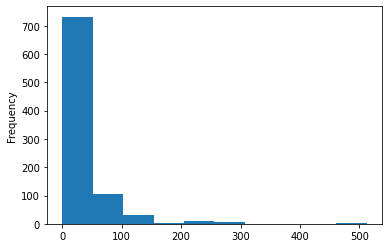

In [15]:
df_treino['Fare'].plot(kind='hist')

- **Poucos passageiros idosos (<1%) na faixa etária de 65 a 80 anos.**

In [16]:
ages = df_treino.groupby(['Age']).size().reset_index(name='qtd').copy()

#numero de pessoas acima de 65 anos
n_pessoas = ages.loc[ages['Age'] > 65]['qtd'].count()

print('{0:.2f}%'.format((n_pessoas*100)/df_treino.shape[0]))

0.67%


In [17]:
df_treino['Age'].quantile(1)

80.0

<AxesSubplot:ylabel='Frequency'>

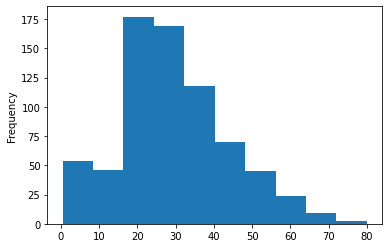

In [18]:
df_treino['Age'].plot(kind='hist')

#### **Qual é a distribuição de variáveis categóricos?**

Isso nos ajuda a determinar, entre outros insights iniciais, quão representativo é o conjunto de dados de treinamento do domínio real do problema das variáveis categóricas.

In [19]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_treino.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- **Os nomes são exclusivos no conjunto de dados (count=unique=891)**

In [21]:
len(df_treino['Name'].unique())

891

- **Listando sobrenomes exclusivos no conjunto de dados, são 667 possiveis familias**

In [22]:
#extrai sobrenomes dos passageiros, isso pode indicar laços familiares
df_treino['Surname'] = df_treino['Name'].str.extract('(^.*(?=(\,)))')[0]
df_test['Surname'] = df_test['Name'].str.extract('(^.*(?=(\,)))')[0]

In [23]:
df_treino[['Name','Surname']].head()

,Name,Surname
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen


In [24]:
len(df_treino['Surname'].unique())

667

- **Variável sexo como dois valores possíveis com 65% masculino (top=masculino, freq=577/count=891).**

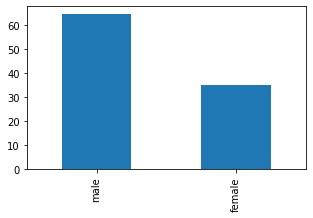

In [25]:
plt.rcParams["figure.figsize"] = (5,3)
(df_treino['Sex'].value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

- **Os valores de cabine têm duplicatas nas amostras e muitos valores nulos, o que pode indicar que vários passageiros compartilhavam uma cabines e que não temos dados suficientes sobre o total de cabines visto que apenas 204 passageiros foram contabilizados em cabines.**

In [26]:
len(df_treino['Cabin'].unique())

148

In [27]:
df_treino.groupby(['Cabin'], dropna=False).size()

Cabin
A10      1
A14      1
A16      1
A19      1
A20      1
      ... 
F38      1
F4       2
G6       4
T        1
NaN    687
Length: 148, dtype: int64

In [28]:
df_treino.groupby(['Cabin'], dropna=True).size().sum()

204

- **Embarcado assume três valores possíveis. Porto S usado pela maioria dos passageiros (topo=S)**

In [29]:
df_treino['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df_treino.groupby(['Embarked'], dropna=False).size()

Embarked
C      168
Q       77
S      644
NaN      2
dtype: int64

- **O recurso Ticket possui alta proporção (22%) de valores duplicados (único=681).**

In [31]:
len(df_treino['Ticket'].unique())

681

In [32]:
df_treino.groupby(['Ticket'], dropna=False).size()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64

### Suposições baseadas na análise de dados

Chegamos às seguintes suposições com base na análise de dados feita até agora. 

**Correlacionando.**

Queremos saber quão bem cada variável se correlaciona com a Sobrevivência. Queremos fazer isso no início de nosso projeto e combinar essas correlações rápidas com correlações modeladas posteriormente no projeto.

**Levantamento de possibilidades.**
1. Podemos querer correlacionar a variável Age, pois está definitivamente correlacionado à sobrevivência.
2. Podemos querer correlacionara variável Embarked, pois ele também pode estar relacionado à sobrevivência ou outro aspecto importante.
3. O recurso Ticket pode ser descartado de nossa análise, pois contém uma alta proporção de duplicatas (22%) e pode não haver uma correlação entre Ticket e sobrevivência.
4. O recurso Cabin pode ser descartado, pois é altamente incompleto ou contém muitos valores nulos no conjunto de dados de treinamento e teste.
5. PassengerId pode ser descartado do conjunto de dados de treinamento, pois não contribui para a sobrevivência.



**Criando.**
1. Podemos querer criar um novo recurso chamado Família com base em Parch e SibSp para obter a contagem total de membros da família a bordo.
2. O recurso de nome não é relevante por si só, mas o nome da familia (Surname) extraido da variável nome pode indicar laços familiares contribuindo assim para chance de sobrevivência
3. Podemos querer criar um novo recurso para faixas etárias. Isso transforma um recurso numérico contínuo em um recurso categórico ordinal.
4. Também podemos criar um recurso de faixa de tarifa se isso ajudar em nossa análise.


**Classificando.**

Também podemos adicionar nossas suposições com base na descrição do problema observada anteriormente.

1. As mulheres (sexo=feminino) tinham maior probabilidade de sobreviver.
2. As crianças (idade <?) tinham maior probabilidade de sobreviver.
3. Os passageiros da classe alta (Pclass=1) tiveram maior probabilidade de sobreviver.

## Analise de variáveis

Para confirmar algumas de nossas observações e suposições, podemos analisar rapidamente nossas correlações de variáveis, em torno de variáveis uma contra outras. Só podemos fazer isso neste estágio para variáveis que não possuem valores vazios. Também faz sentido fazê-lo apenas para variáveis do tipo categórico (Sex), ordinal (Pclass) ou discreto (SibSp, Parch).

- **Pclass** Observamos correlação significativa (>0,5) entre Pclass=1 e Sobreviveu (classificação #3). Decidimos incluir esse recurso em nosso modelo.
- **Sexo** Confirmamos a observação durante a definição do problema de que Sexo=feminino teve uma taxa de sobrevivência muito alta em 74% (classificação #1).
- **SibSp e Parch** Esses recursos têm correlação zero para determinados valores. Pode ser melhor derivar um recurso ou um conjunto de recursos desses recursos individuais (criando #1).

In [33]:
df_treino[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [34]:
df_treino[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [35]:
df_treino[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [36]:
df_treino[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analise visualizando dados

Agora podemos continuar confirmando algumas de nossas suposições usando visualizações para analisar os dados.

### Correlacionando recursos numéricos

Vamos começar entendendo as correlações entre as variáveis numéricas e nossa variável de alvo (Survived).

Um gráfico de histograma é útil para analisar variáveis ​​numéricas contínuas, como Idade, em que faixas ou intervalos ajudarão a identificar padrões úteis. O histograma pode indicar a distribuição de amostras usando bins definidos automaticamente ou bandas com intervalos iguais. Isso nos ajuda a responder perguntas relacionadas a faixas específicas (os bebês tiveram melhor taxa de sobrevivência?)

Observe que o eixo x em visualizações de histograma representa a contagem de amostras ou passageiros.

**Observações.**

- Crianças (idade <=4) tiveram alta taxa de sobrevida.
- Os passageiros mais velhos (idade = 80) sobreviveram.
- Grande número de jovens de 15 a 25 anos não sobreviveu.
- A maioria dos passageiros está na faixa etária de 15 a 35 anos.

**Decisões.**

Essa análise simples confirma nossas suposições como decisões para os estágios subsequentes do fluxo de trabalho.

- Devemos considerar Idade (nossa suposição classificando #2) em nosso treinamento de modelo.
- Completar a variável Idade para valores nulos (completando #1).
- Devemos agrupar faixas etárias (criando #3).

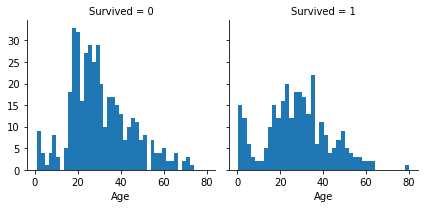

In [37]:
plt.rcParams["figure.figsize"] = (8,4)
g = sns.FacetGrid(df_treino, col='Survived')
g.map(plt.hist, 'Age', bins=40)

### Correlacionando variáveis numéricas e ordinais

Podemos combinar várias variáveis para identificar correlações usando um único gráfico. Isso pode ser feito com variáveis numéricas e categóricas que possuem valores numéricos.

**Observações.**

- Pclass=3 teve mais passageiros, porém a maioria não sobreviveu. Confirma nossa suposição de classificação #2.
- Passageiros infantis em Pclass=2 e Pclass=3 sobreviveram principalmente. Qualifica ainda mais nossa suposição de classificação #2.
- A maioria dos passageiros em Pclass=1 sobreviveu. Confirma nossa suposição de classificação #3.
- A Pclass varia em função da distribuição etária dos passageiros.

**Decisões.**
- Considere o Pclass para treinamento de modelo.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


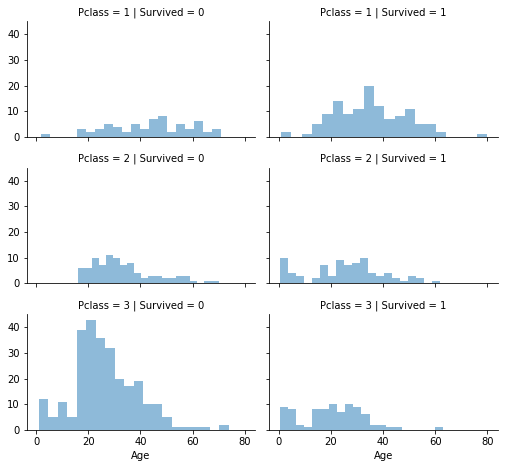

In [38]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df_treino, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [39]:
len(df_treino[df_treino['Pclass']==1]['Surname'].unique())

172

In [40]:
len(df_treino[df_treino['Survived']==1]['Surname'].unique())

280

In [41]:
sobreviventes_sobrenomes = df_treino[df_treino['Survived']==1]['Surname'].unique()
primeira_classe_sobrenomes = df_treino[df_treino['Pclass']==1]['Surname'].unique()

In [42]:
sobreviventes_primeira_classe = [sobrevivente for sobrevivente in sobreviventes_sobrenomes
                                 if sobrevivente in primeira_classe_sobrenomes]

In [43]:
len(sobreviventes_primeira_classe)

116

### Correlacionando recursos categóricos

Agora podemos correlacionar variáveis categóricas com nossa variável alvo.

**Observações.**

- Passageiros do sexo feminino tiveram taxa de sobrevivência muito melhor do que os do sexo masculino. Confirma a classificação.
- Exceção em Embarcado=C onde os machos tiveram maior taxa de sobrevivência. Isso pode ser uma correlação entre Pclass e Embarcado e, por sua vez, Pclass e Sobrevivido, não necessariamente uma correlação direta entre Embarcado e Sobrevivido.
- Os machos tiveram melhor sobrevida em Pclass=3 quando comparados com Pclass=2 para portas C e Q. Completando.
- Os portos de embarque têm taxas de sobrevivência variadas para Pclass=3 e entre passageiros do sexo masculino. Correlacionando.
- Sobrenomes também estão associados a laços familiares e primeiras classes, o que reforça a chance de sobrevivência

**Decisões.**

- Adicione a variável Sex ao treinamento do modelo.
- Complete e adicione a variável Embarked ao treinamento do modelo.
- Adicione a variável Surname ao treinamento do modelo

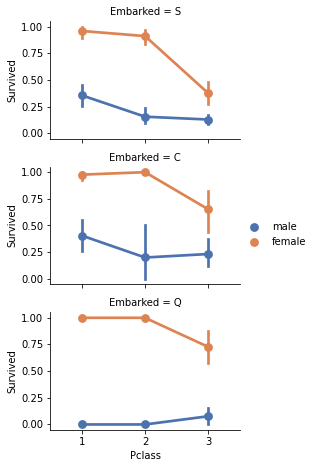

In [44]:
grid = sns.FacetGrid(df_treino, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 
         'Pclass', 'Survived', 'Sex', 
         palette='deep', order=[1, 2, 3], hue_order=["male", "female"])
grid.add_legend()

### Correlacionando recursos categóricos e numéricos

Também podemos querer correlacionar variáveis categóricas (com valores não numéricos) e variáveis numéricas. Podemos considerar correlacionar Embarked (Categoria não numérica), Sex (Categoria não numérica), Fare (Numérica contínua), com Sobrevivência (categórica numérica).

**Observações.**

- Passageiros pagantes de tarifas mais altas tiveram melhor sobrevivência. Confirma nossa suposição para criar faixas de tarifas.
- O porto de embarque correlaciona-se com as taxas de sobrevivência. Confirma a correlação e a conclusão.

**Decisões.**

- Considere a variável Fare por faixas.

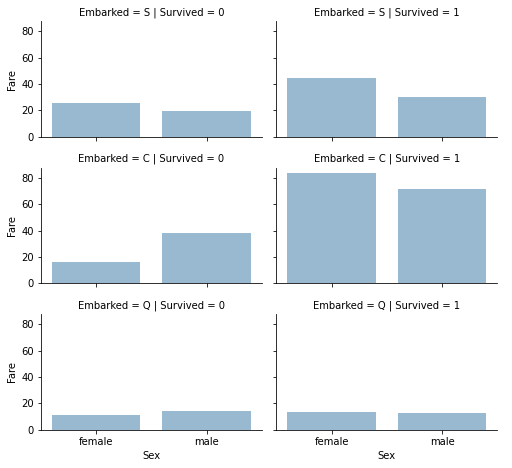

In [45]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df_treino, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=["female", "male"])
grid.add_legend()

## Disputar dados

Coletamos várias suposições e decisões sobre nossos conjuntos de dados e requisitos de solução. Até agora, não tivemos que alterar uma única variável ou valor para chegar a isso. Vamos agora executar nossas decisões e suposições para corrigir, criar e completar metas.

### Corrigindo eliminando recursos

Este é um bom objetivo inicial para executar. Ao descartar variáveis, estamos lidando com menos pontos de dados. Agiliza nosso notebook e facilita a análise.

Com base em nossas suposições e decisões, queremos descartar as variáveis Cabin e Ticket.

Observe que, quando aplicável, realizamos operações nos conjuntos de dados de treinamento e teste juntos para manter a consistência.

In [46]:
print("Antes", df_treino.shape, df_test.shape, datasets[0].shape, datasets[1].shape)

df_treino = df_treino.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
datasets = [df_treino, df_test]

print("Depois", df_treino.shape, df_test.shape, datasets[0].shape, datasets[1].shape)

Antes (891, 13) (418, 12) (891, 13) (418, 12)
Depois (891, 11) (418, 10) (891, 11) (418, 10)


### Criando um novo recurso extraindo de um existente

Queremos analisar se o recurso Name pode ser projetado para extrair sobrenomes e testar a correlação entre sobrenomes e sobrevivência, antes de descartar os recursos Name.

No código a seguir, extraímos a variável sobrenome usando expressões regulares. O padrão RegEx `(\w+\.)` corresponde à primeira palavra que termina com um caractere de ponto dentro do recurso Nome. O sinalizador `expand=False` retorna um DataFrame.

**Observações.**

Quando plotamos Título, Idade e Sobreviveu, notamos as seguintes observações.

- A maioria dos títulos banda faixas etárias com precisão. Por exemplo: Título de mestre tem média de idade de 5 anos.
- A sobrevivência entre as faixas de idade do título varia um pouco.
- Certos títulos sobreviveram principalmente (Mme, Lady, Sir) ou não (Don, Rev, Jonkheer).

**Decisão.**

- Decidimos manter o novo recurso de título para treinamento de modelo.

In [47]:
for dataset in datasets:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_treino['Title'], df_treino['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [48]:
df_treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Surname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Behr,Mr


Podemos substituir muitos títulos por um nome mais comum ou classificá-los como `Raros`.

In [49]:
for dataset in datasets:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_treino[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Podemos converter os títulos categóricos para ordinais.

In [50]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in datasets:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Surname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Cumings,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Heikkinen,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Futrelle,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Allen,1


In [51]:
pd.crosstab(df_treino['Title'], df_treino['Sex'])

Sex,female,male
Title,,
1,0,517
2,185,0
3,126,0
4,0,40
5,3,20


Agora podemos descartar com segurança o recurso Nome dos conjuntos de dados de treinamento e teste. Também não precisamos do recurso PassengerId no conjunto de dados de treinamento.

In [52]:
df_treino = df_treino.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
datasets = [df_treino, df_test]
df_treino.shape, df_test.shape

((891, 10), (418, 10))

### Convertendo um recurso categórico

Agora podemos converter as variáveis que contêm strings em valores numéricos. Isso é exigido pela maioria dos algoritmos de modelo. Isso também nos ajudará atingir a variável alvo.

Vamos começar convertendo a variável Sex em uma nova variável chamada Gender, onde feminino=1 e masculino=0.

In [53]:
for dataset in datasets:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Surname,Title
0,0,3,0,22.0,1,0,7.2500,S,Braund,1
1,1,1,1,38.0,1,0,71.2833,C,Cumings,3
2,1,3,1,26.0,0,0,7.9250,S,Heikkinen,2
3,1,1,1,35.0,1,0,53.1000,S,Futrelle,3
4,0,3,0,35.0,0,0,8.0500,S,Allen,1


### Concluindo um recurso contínuo numérico

Agora devemos começar a estimar e completar as variáveis com valores ausentes ou nulos. Faremos isso primeiro para a variável Idade.

Podemos considerar três métodos para completar uma variável numérica contínua.

1. Uma maneira simples é gerar números aleatórios entre média e [desvio padrão](https://en.wikipedia.org/wiki/Standard_deviation).

2. Uma maneira mais precisa de adivinhar valores ausentes é usar outras variáveis correlacionadas. No nosso caso notamos correlação entre Age, Gender e Pclasse. Adivinhar valores de Age usando valores [mediana](https://en.wikipedia.org/wiki/Median) para idade em conjuntos de combinações de variáveis de Pclasse e gênero. Então, idade mediana para Pclass=1 e Gender=0, Pclass=1 e Gender=1, e assim por diante...

3. Combine os métodos 1 e 2. Então, em vez de adivinhar valores de idade com base na mediana, use números aleatórios entre média e desvio padrão, com base em conjuntos de combinações de Pclass e Gender.

Os métodos 1 e 3 introduzirão ruído aleatório em nossos modelos. Os resultados de várias execuções podem variar. Vamos preferir o método 2.

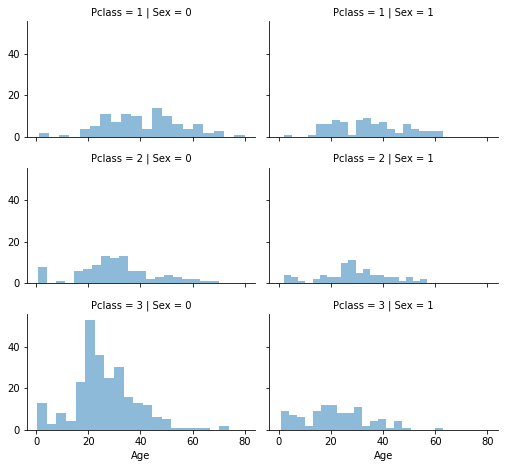

In [54]:
grid = sns.FacetGrid(df_treino, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Vamos começar preparando um array vazio para conter valores de idade estimados com base nas combinações de Pclass x Gender.

In [55]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Agora iteramos sobre Sex (0 ou 1) e Pclass (1, 2, 3) para calcular os valores estimados de Age para as seis combinações.

In [56]:
for dataset in datasets:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (
                dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Converte de idade aleatória para a idade 0,5 mais próxima
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & 
                        (dataset.Sex == i) & 
                        (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]

    dataset['Age'] = dataset['Age'].astype(int)

df_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Surname,Title
0,0,3,0,22,1,0,7.2500,S,Braund,1
1,1,1,1,38,1,0,71.2833,C,Cumings,3
2,1,3,1,26,0,0,7.9250,S,Heikkinen,2
3,1,1,1,35,1,0,53.1000,S,Futrelle,3
4,0,3,0,35,0,0,8.0500,S,Allen,1


Vamos criar faixas etárias e determinar correlações com Sobrevivência.

In [57]:
df_treino['AgeBand'] = pd.cut(df_treino['Age'], 5)
df_treino[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Vamos converter os sobrenomes em uma distribuição de frequência 

In [58]:
surnames = []
for dataset in datasets:
    surnames = dataset['Surname'].to_list()
    
    vector_surnames = {}
    for surname in surnames:

        norm_surname = surname.lower()
        if norm_surname in vector_surnames:
            vector_surnames[norm_surname] +=1
        else:
            vector_surnames[norm_surname] = 1
            
    dataset['SurnameFrequency'] = dataset['Surname'].apply(lambda x: vector_surnames[x.lower()])
    
    del dataset['Surname']
    
df_treino['SurnameFrequency']

0      2
1      1
2      1
3      2
4      2
      ..
886    1
887    3
888    2
889    1
890    1
Name: SurnameFrequency, Length: 891, dtype: int64

Vamos substituir Age por ordinais baseados nessas faixas.

In [59]:
for dataset in datasets:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
df_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,SurnameFrequency
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]",2
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]",1
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]",2
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]",2


We can not remove the AgeBand feature.

In [60]:
df_treino = df_treino.drop(['AgeBand'], axis=1)
datasets = [df_treino, df_test]
df_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SurnameFrequency
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,1
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,2


### Criar uma nova variável combinando variáveis existentes

Podemos criar uma nova variável para tamanho da familia que combina Parch e SibSp. Isso nos permitirá remover Parch e SibSp de nossos conjuntos de dados.

In [61]:
for dataset in datasets:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_treino[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Podemos criar outra variável chamado para quem estava sozinho.

In [62]:
for dataset in datasets:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

df_treino[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Deixemos de lado os as variáveis Parch, SibSp e FamilySize em favor do IsAlone.

In [63]:
df_treino = df_treino.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
datasets = [df_treino, df_test]

df_treino.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,SurnameFrequency,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,1,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,2,1


Também podemos criar uma variável artificial combinando Pclass e Age.

In [64]:
for dataset in datasets:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

df_treino.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Concluindo um recurso categórico

A variável Embarked leva os valores S, Q, C com base no porto de embarque. Nosso conjunto de dados de treinamento tem dois valores ausentes. Nós simplesmente os preenchemos com a ocorrência mais comum.

In [65]:
freq_port = df_treino.Embarked.dropna().mode()[0]
freq_port

'S'

In [66]:
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
df_treino[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Convertendo recurso categórico em numérico

Agora podemos converter o recurso Embarked criando uma nova variável numérica.

In [67]:
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_treino.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,SurnameFrequency,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,2,0,3
1,1,1,1,2,71.2833,1,3,1,0,2
2,1,3,1,1,7.9250,0,2,1,1,3
3,1,1,1,2,53.1000,0,3,2,0,2
4,0,3,0,2,8.0500,0,1,2,1,6


### Conclusão e conversão rápida de um recurso numérico

Agora podemos concluir o recurso Tarifa para um único valor ausente no conjunto de dados de teste usando o modo para obter o valor que ocorre com mais frequência para esse recurso. Fazemos isso em uma única linha de código.

Observe que não estamos criando um novo recurso intermediário ou fazendo qualquer análise adicional de correlação para adivinhar a variável ausente, pois estamos substituindo apenas um único valor. A meta de conclusão atinge o requisito desejado para que o algoritmo do modelo opere em valores não nulos.

Também podemos querer arredondar a tarifa para duas casas decimais, pois representa a moeda.

In [68]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,SurnameFrequency,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,1,6
1,893,3,1,2,7.0000,0,3,1,0,6
2,894,2,0,3,9.6875,2,1,1,1,6
3,895,3,0,1,8.6625,0,1,1,1,3
4,896,3,1,1,12.2875,0,3,1,0,3


Podemos criar FareBand.

In [69]:
df_treino['FareBand'] = pd.qcut(df_treino['Fare'], 4)
df_treino[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Converta a variável Tarifa em valores ordinais com base na faixa das tarifas

In [70]:
for dataset in datasets:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df_treino = df_treino.drop(['FareBand'], axis=1)
datasets = [df_treino, df_test]
    
df_treino.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,SurnameFrequency,IsAlone,Age*Class
0,0,3,0,1,0,0,1,2,0,3
1,1,1,1,2,3,1,3,1,0,2
2,1,3,1,1,1,0,2,1,1,3
3,1,1,1,2,3,0,3,2,0,2
4,0,3,0,2,1,0,1,2,1,6
5,0,3,0,1,1,2,1,3,1,3
6,0,1,0,3,3,0,1,1,1,3
7,0,3,0,0,2,0,4,4,0,0
8,1,3,1,1,1,0,3,6,0,3
9,1,2,1,0,2,1,3,2,0,0


E o conjunto de dados de teste.

In [71]:
df_test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,SurnameFrequency,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,1,6
1,893,3,1,2,0,0,3,1,0,6
2,894,2,0,3,1,2,1,1,1,6
3,895,3,0,1,1,0,1,1,1,3
4,896,3,1,1,1,0,3,1,0,3
5,897,3,0,0,1,0,1,1,1,0
6,898,3,1,1,0,2,2,1,1,3
7,899,2,0,1,2,0,1,1,0,2
8,900,3,1,1,0,1,3,1,1,3
9,901,3,0,1,2,0,1,4,0,3


## Modele, preveja e resolva

Agora estamos prontos para treinar um modelo e prever a solução necessária. Existem mais de 60 algoritmos de modelagem preditiva para escolher. Devemos entender o tipo de problema e requisito de solução para restringir a alguns modelos selecionados que podemos avaliar. Nosso problema é um problema de classificação e regressão. Queremos identificar a relação entre a saída (Sobreviveu ou não) com outras variáveis ou características (Sexo, Idade, Porto...). Também estamos realizando uma categoria de aprendizado de máquina que é chamada de aprendizado supervisionado, pois estamos treinando nosso modelo com um determinado conjunto de dados. Com esses dois critérios - Aprendizado Supervisionado mais Classificação e Regressão, podemos reduzir nossa escolha de modelos a alguns. Esses incluem:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [72]:
X_treino = df_treino.drop("Survived", axis=1)
Y_treino = df_treino["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

X_treino.shape, Y_treino.shape, X_test.shape

((891, 9), (891,), (418, 9))

A regressão logística é um modelo útil para ser executado no início do fluxo de trabalho. A regressão logística mede a relação entre a variável dependente categórica (característica) e uma ou mais variáveis independentes (características) estimando probabilidades usando uma função logística, que é a distribuição logística cumulativa. Referência [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Observe a pontuação de confiança gerada pelo modelo com base em nosso conjunto de dados de treinamento.

In [73]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_treino, Y_treino)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_treino, Y_treino) * 100, 2)
acc_log

81.14

Podemos usar a regressão logística para validar nossas suposições e decisões para criação de variáveis e conclusão de metas. Isso pode ser feito calculando o coeficiente das características na função de decisão.

Os coeficientes positivos aumentam as probabilidades logarítmicas da resposta (e, portanto, aumentam a probabilidade), e os coeficientes negativos diminuem as probabilidades logarítmicas da resposta (e, portanto, diminuem a probabilidade).

- Sexo é o coeficiente positivo mais alto, implicando que quanto mais o valor de Sexo aumenta (masculino: 0 a feminino: 1), a probabilidade de Sobrevivência=1 aumenta mais.
- Inversamente à medida que Pclass aumenta, a probabilidade de Sobrevivência=1 diminui mais.
- Desta forma, Age*Class é um bom recurso artificial para modelar, pois tem a segunda maior correlação negativa com o Survived.
- O título também é a segunda correlação positiva mais alta.

In [74]:
coeff_df = pd.DataFrame(df_treino.columns.delete(0))
coeff_df.columns = ['Feature']

coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.204567
5,Title,0.430690
2,Age,0.350841
4,Embarked,0.220893
3,Fare,0.074454
7,IsAlone,-0.143555
6,SurnameFrequency,-0.320074
8,Age*Class,-0.376911
0,Pclass,-0.484317


Em seguida, modelamos usando Support Vector Machines, que são modelos de aprendizado supervisionado com algoritmos de aprendizado associados que analisam dados usados para classificação e análise de regressão. Dado um conjunto de amostras de treinamento, cada uma marcada como pertencente a uma ou outra de **duas categorias**, um algoritmo de treinamento SVM cria um modelo que atribui novas amostras de teste a uma categoria ou outra, tornando-o um binário não probabilístico classificador linear. Referência [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Observe que o modelo gera uma pontuação de confiança maior que o modelo de regressão logística.

In [75]:
# Support Vector Machines

svc = SVC()
svc.fit(X_treino, Y_treino)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_treino, Y_treino) * 100, 2)
acc_svc

81.26

No reconhecimento de padrões, o algoritmo k-Nearest Neighbors (ou k-NN para abreviar) é um método não paramétrico usado para classificação e regressão. Uma amostra é classificada pelo voto majoritário de seus vizinhos, com a amostra sendo atribuída à classe mais comum entre seus k vizinhos mais próximos (k é um inteiro positivo, tipicamente pequeno). Se k = 1, então o objeto é simplesmente atribuído à classe daquele único vizinho mais próximo. Referência [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

A pontuação de confiança do KNN é melhor do que a regressão logística, e do que o SVM.

In [76]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_treino, Y_treino)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_treino, Y_treino) * 100, 2)
acc_knn

85.07

No aprendizado de máquina, os classificadores Bayes ingênuos são uma família de classificadores probabilísticos simples baseados na aplicação do teorema de Bayes com suposições de independência fortes (ingênuas) entre os recursos. Os classificadores Naive Bayes são altamente escaláveis, exigindo uma série de parâmetros lineares no número de variáveis (características) em um problema de aprendizado. Referência [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

O escore de confiança gerado pelo modelo é o mais baixo entre os modelos avaliados até o momento.

In [77]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_treino, Y_treino)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_treino, Y_treino) * 100, 2)
acc_gaussian

72.62

O perceptron é um algoritmo para aprendizado supervisionado de classificadores binários (funções que podem decidir se uma entrada, representada por um vetor de números, pertence ou não a alguma classe específica). É um tipo de classificador linear, ou seja, um algoritmo de classificação que faz suas previsões com base em uma função de previsão linear combinando um conjunto de pesos com o vetor de características. O algoritmo permite o aprendizado online, pois processa os elementos do conjunto de treinamento um de cada vez. Referência [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [78]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_treino, Y_treino)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_treino, Y_treino) * 100, 2)
acc_perceptron

52.19

In [79]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_treino, Y_treino)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_treino, Y_treino) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


80.81

In [80]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_treino, Y_treino)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_treino, Y_treino) * 100, 2)
acc_sgd

77.1

Este modelo usa uma árvore de decisão como um modelo preditivo que mapeia características (galhos de árvore) para conclusões sobre o valor alvo (folhas de árvore). Os modelos de árvore em que a variável de destino pode assumir um conjunto finito de valores são chamados de árvores de classificação; nessas estruturas de árvore, as folhas representam rótulos de classe e ramos representam conjunções de recursos que levam a esses rótulos de classe. As árvores de decisão em que a variável de destino pode assumir valores contínuos (geralmente números reais) são chamadas de árvores de regressão. Referência [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

A pontuação de confiança do modelo é a mais alta entre os modelos avaliados até o momento.

In [81]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_treino, Y_treino)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_treino, Y_treino) * 100, 2)
acc_decision_tree

89.67

O próximo modelo Random Forests é um dos mais populares. Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizado conjunto para classificação, regressão e outras tarefas, que operam construindo uma infinidade de árvores de decisão (n_estimators = 100) no tempo de treinamento e gerando a classe que é o modo das classes (classificação) ou previsão média (regressão) das árvores individuais. Referência [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

A pontuação de confiança do modelo é a mais alta entre os modelos avaliados até o momento. Decidimos usar a saída deste modelo (Y_pred) para criar nossa submissão de resultados de competição.

In [82]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_treino, Y_treino)
Y_pred = random_forest.predict(X_test)

random_forest.score(X_treino, Y_treino)

acc_random_forest = round(random_forest.score(X_treino, Y_treino) * 100, 2)
acc_random_forest

89.67

### Avaliação do modelo

Agora podemos classificar nossa avaliação de todos os modelos para escolher o melhor para nosso problema. Embora tanto a Decision Tree quanto a Random Forest tenham a mesma pontuação, optamos por usar a Random Forest, pois corrigem o hábito de overfitting das árvores de decisão ao seu conjunto de treinamento.

In [83]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.67
8,Decision Tree,89.67
1,KNN,85.07
0,Support Vector Machines,81.26
2,Logistic Regression,81.14
7,Linear SVC,80.81
6,Stochastic Gradient Decent,77.10
4,Naive Bayes,72.62
5,Perceptron,52.19


In [84]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })

In [85]:
submission.to_csv('./submission.csv', index=False)

In [86]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
